In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Fetch historical stock data
stock_data = yf.download("0005.HK", start="2016-02-15", end="2017-05-11")

# Extract adjusted closing prices
market_prices = stock_data['Adj Close']
returns = (market_prices - market_prices.shift(1)) / market_prices

# Calculate sigma and r
sigma = np.std(returns[1:])
r = np.mean(returns[1:])

# Generate GBM simulation
N = len(market_prices)
t = np.arange(0, N)
a = (1 + r) * (1 - sigma) - 1
b = (1 + r) * (1 + sigma) - 1
X = (a + b) / 2 + (b - a) * np.random.normal(0, 1, N - 1) / 2
X = np.concatenate([[market_prices.iloc[0]], market_prices.iloc[0]*np.cumprod(1 + X)])
# X = np.array([X])

[*********************100%%**********************]  1 of 1 completed


In [52]:
S = np.zeros(N)
S[0] = market_prices.iloc[0]
for i in range(1, N):
    S[i] = S[i - 1] * np.exp(sigma * np.random.normal(0, 1, 1)[0] + r - 0.5 * sigma ** 2)

In [53]:
# Calculate the exponential growth
dexp = S[0] * np.exp(r * np.arange(1, N + 1))

# Create a pandas DataFrame with dates as the index
ddexp = pd.DataFrame({'dexp': dexp}, index=market_prices.index)

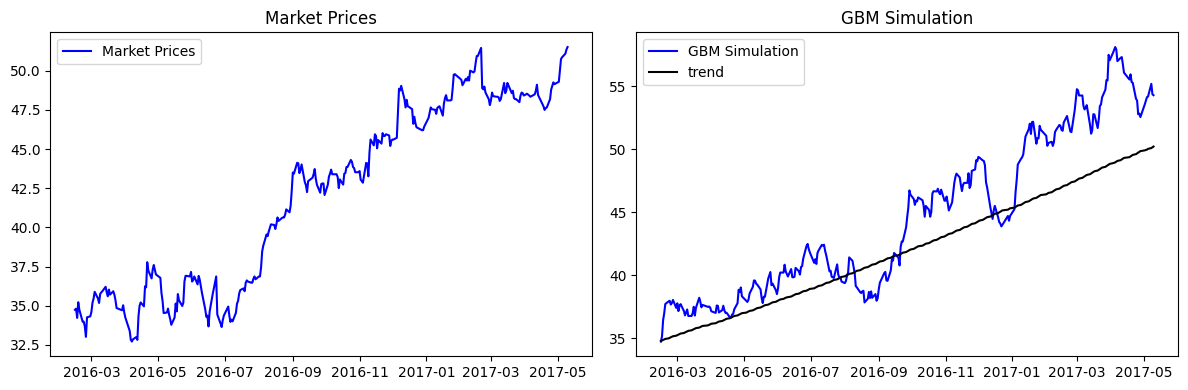

In [54]:
# Create GBM DataFrame
dates = market_prices.index
gbm = pd.DataFrame(data=S, index=dates, columns=['GBM'])

# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot market prices
axes[0].plot(market_prices.index, market_prices, label='Market Prices', color='blue')
axes[0].legend()
axes[0].set_title('Market Prices')

# Plot GBM simulation
axes[1].plot(gbm.index, gbm['GBM'], label='GBM Simulation', color='blue')
axes[1].plot(ddexp.index, ddexp['dexp'], label='trend', color='black')
axes[1].legend()
axes[1].set_title('GBM Simulation')

plt.tight_layout()
plt.show()